In [132]:
# Import essentials
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

# Set white grid styling
sns.set_style('whitegrid')

# Stats
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats as stats

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [133]:
# Read dataset files
test_df = pd.read_csv('./dataset/test.csv', index_col=0)

In [187]:
test_df.dropna(inplace=True) # There was NaNs on revenue column
test_df.to_csv('./dataset/ml_test.csv')

# Statistical Analysis
In this section, I'll be applying three separate hypothesis tests:
- **ANOVA (Analysis of Variance)** - Testing categorical and quantitaive Variables to determine whether is_open and lifespan columns are related
- **Chi-Square** - Testing two categorical variables
- **Pearson Correlation** - Testing two qunatitative variables

I'll be making decision whether to reject null hypothesis ($H_0$) or not based on standard p-value cutoff of 0.05 or 5%.
- p-value < $\alpha$ (0.05) - Data providing significant evidence against the null hypothesis ($H_0$) and accept the alternate hypothesis ($H_a$). In other words, it is more than 95% likely that the association of interest would be present following repeated smaples drawn from the population.
- p-value > $\alpha$ (0.05) - Data do not provide enough evidence against the null hypothesis ($H_0$)

In [167]:
test_df

review_count  adjusted_stars     price  is_open  caters  goodforkids  \
0          0.001342        0.670984  0.000000      1.0     0.0          0.0   
1          0.004027        0.678756  0.000000      1.0     0.0          1.0   
2          0.004027        0.544041  0.000000      0.0     0.0          0.0   
3          0.025503        0.704663  0.333333      1.0     0.0          0.0   
4          0.100671        0.730570  0.333333      1.0     0.0          0.0   
...             ...             ...       ...      ...     ...          ...   
39819      0.006711        0.443005  1.000000      0.0     0.0          0.0   
39820      0.303356        0.743523  0.000000      1.0     1.0          1.0   
39821      0.022819        0.437824  0.000000      1.0     0.0          1.0   
39822      0.122148        0.733161  0.333333      0.0     0.0          0.0   
39823      0.001342        0.670984  0.333333      0.0     0.0          1.0   

       alcohol  goodforgroups  tableservice  drivethru  ...       pos  \
0          0.0            0.0           0.0        0.0  ...  0.535683   
1          0.0            0.0           0.0        0.0  ...  0.453430   
2          1.0            0.0           0.0        0.0  ...  0.363436   
3          0.0            0.0           1.0        0.0  ...  0.508811   
4          1.0            1.0           0.0        0.0  ...  0.593778   
...        ...            ...           ...        ...  ...       ...   
39819      1.0            1.0           0.0        0.0  ...  0.310022   
39820      1.0            1.0           1.0        0.0  ...  0.506767   
39821      0.0            1.0           0.0        0.0  ...  0.295655   
39822      1.0            1.0           1.0        0.0  ...  0.531041   
39823      1.0            1.0           0.0        0.0  ...  0.567401   

       compound   revenue  pos_review  neg_review  stars_1.0  stars_2.0  \
0      0.953855  0.000066    0.005952    0.002024   0.000000   0.007353   
1      0.806740  0.000157    0.008929    0.002024   0.000000   0.000000   
2      0.598692  0.000079    0.004464    0.010121   0.006154   0.022059   
3      0.909050  0.000931    0.028274    0.010121   0.000000   0.007353   
4      0.906064  0.006413    0.101190    0.024291   0.009231   0.007353   
...         ...       ...         ...         ...        ...        ...   
39819  0.497336  0.000695    0.000000    0.016194   0.018462   0.007353   
39820  0.851346  0.008538    0.254464    0.129555   0.049231   0.058824   
39821  0.640372  0.000341    0.008929    0.032389   0.024615   0.022059   
39822  0.912972  0.005049    0.107143    0.050607   0.015385   0.088235   
39823  0.981578  0.000249    0.005952    0.002024   0.000000   0.000000   

       stars_3.0  stars_4.0  stars_5.0  
0       0.000000   0.000000   0.006250  
1       0.005917   0.006329   0.006250  
2       0.000000   0.003165   0.003125  
3       0.011834   0.018987   0.023438  
4       0.023669   0.025316   0.100000  
...          ...        ...        ...  
39819   0.005917   0.000000   0.000000  
39820   0.130178   0.196203   0.198437  
39821   0.041420   0.009494   0.001563  
39822   0.047337   0.063291   0.081250  
39823   0.005917   0.006329   0.003125  

[38858 rows x 158 columns]

## ANOVA Testing - Categorical and Quantitative Variables
Evaluate whether or not there's an association between restaurant's current business status (close or open - categorical variable) and how long restaurant has been operating for (lifespan - quantitative variable).

- $H_0$ - Restaurant's lifespan and restaurant's business status are ***unrelated***.
- $H_a$ - Restaurant's lifespan and restaurant's business status are ***related***.

Restaurants that are *open for business* has average lifespan of **0.38** with standard deviation of **0.24**

In [168]:
test_df[test_df['is_open'] == 1]['lifespan'].describe()

count    25028.000000
mean         0.384211
std          0.242716
min          0.000000
25%          0.170844
50%          0.362797
75%          0.586412
max          1.000000
Name: lifespan, dtype: float64

Restaurants that are *closed for business* has average lifespan of **0.24** with standard deviation of **0.18**

In [169]:
test_df[test_df['is_open'] == 0]['lifespan'].describe()

count    13830.000000
mean         0.243786
std          0.183021
min          0.000000
25%          0.096306
50%          0.197889
75%          0.351583
max          0.980211
Name: lifespan, dtype: float64

While it is true that 0.38 lifespan is more than 0.24 lifespan, it's not at all clear that this is a large enough difference to reject the null hypothesis. Or to say that restaurants with higher lifespan are more likely to be open than restaurants with low lifespan. So we ned to assess the evidence in order to determine whether the data provides srong evidence against the null hypothesis to cliam that there is no relationship between lifespan and restaurant business status (is_open)

#### Visualizing open and closed businesses' lifespan
Open restaurants generally have higher lifespan and there are minor overlap because of small amount of variation within two groups, which demonstrates that thse two groups does not have equal population needs where rejecting null hypothesis is more likely than accepting it.

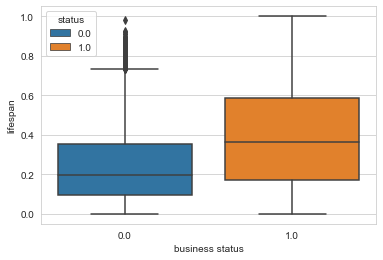

In [170]:
ax = sns.boxplot(x='is_open', y='lifespan', hue='is_open', data=test_df, dodge=False)
ax.set(xlabel='business status')
plt.legend(loc='upper left', title='status');

#### Testing
- Explanatory variable - categorical: is_open (1=Open / 0=Close)
- Response variable - quantitative: (Range 0-1)

In [171]:
# Using ols method for calculating the F-stats nd associated p-value
# formula=continuous variable ~ C(categorical variable)
model_one = smf.ols(formula='lifespan ~ C(is_open)', data=test_df).fit()
model_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lifespan   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     3523.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:55:07   Log-Likelihood:                 3120.1
No. Observations:               38858   AIC:                            -6236.
Df Residuals:                   38856   BIC:                            -6219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2438      0.002    128.386      0.000       0.240       0.248
C(is_open)[T.1.0]     0.1404      0.002     59.351      0.000       0.136       0.145
==============================================================================
Omnibus:                     3210.521   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1815.244
Skew:                           0.386   Prob(JB):                         0.00
Kurtosis:                       2.275   Cond. No.                         3.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value is incredible small with high F-statistics which tells us that there is an association between restaurant lifespan and closed/open restaurant status (is_open). 

#### Retaurant Status and Revenues
- $H_0$ - Restaurant's revenues and restaurant's business status are ***unrelated***.
- $H_a$ - Restaurant's revenues and restaurant's business status are ***related***.

Restaurants that are *open for business* has average revenue of **0.006** with standard deviation of **0.013**

In [172]:
test_df[test_df['is_open'] == 1]['revenue'].describe()

count    25028.000000
mean         0.005927
std          0.013574
min          0.000013
25%          0.000485
50%          0.001600
75%          0.005495
max          1.000000
Name: revenue, dtype: float64

Restaurants that are *open for business* has average revenue of **0.003** with standard deviation of **0.007**

In [173]:
test_df[test_df['is_open'] == 0]['revenue'].describe()

count    13830.000000
mean         0.003248
std          0.007698
min          0.000000
25%          0.000354
50%          0.000918
75%          0.002715
max          0.127202
Name: revenue, dtype: float64

Open restaurants generally have higher revenues compared to closed restaurants

In [174]:
# Using ols method for calculating the F-stats nd associated p-value
# formula=continuous variable ~ C(categorical variable)
model_two = smf.ols(formula='revenue ~ C(is_open)', data=test_df).fit()
model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     457.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.87e-101
Time:                        22:55:39   Log-Likelihood:             1.1731e+05
No. Observations:               38858   AIC:                        -2.346e+05
Df Residuals:                   38856   BIC:                        -2.346e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0032      0.000     32.310      0.000       0.003       0.003
C(is_open)[T.1.0]     0.0027      0.000     21.386      0.000       0.002       0.003
==============================================================================
Omnibus:                    84954.102   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2788518431.294
Skew:                          19.120   Prob(JB):                         0.00
Kurtosis:                    1314.800   Cond. No.                         3.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value is significantly less than alpha; therefore, we can safely state that there is a relationship between business status and its revenue. In other words, there is higher likelihood that restaurants with high revenue are open.

## Chi Square Test - Two Categorical Variables
Evaluate whether or not there's an association between restaurant's business status (close or open - categorical variable) and star ratings columns.

- $H_0$ - Restaurant's lifespan and restaurant's star rating counts are ***unrelated***.
- $H_a$ - Restaurant's lifespan and restaurant's star rating counts are ***related***.

#### Create Observed Data
- Get required stars and is_open column column
- Catplot for visualization
- Create contingency table
- Invoke chi-square test

In [175]:
cols = test_df.columns[-5:].tolist() # get stars_1.0, stars_2.0, stars_3.0, stars_4.0, stars_5.0 columns
cols.append('is_open')
star_df = test_df[cols]

#### Plot to visualize difference between close and open

In [176]:
catplot_df = star_df.melt('is_open', var_name='rating_range', value_name='count')
catplot_df.head()

is_open rating_range     count
0      1.0    stars_1.0  0.000000
1      1.0    stars_1.0  0.000000
2      0.0    stars_1.0  0.006154
3      1.0    stars_1.0  0.000000
4      1.0    stars_1.0  0.009231

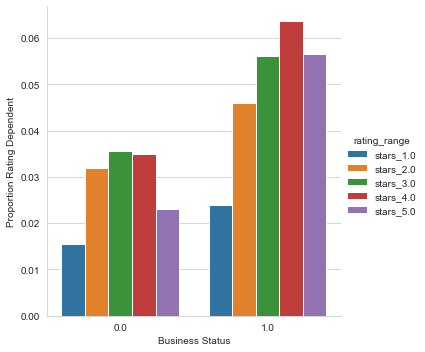

In [177]:
sns.catplot(x='is_open', y='count', hue='rating_range', data=catplot_df, kind='bar', ci=None)
plt.xlabel('Business Status')
plt.ylabel('Proportion Rating Dependent');

Just from the visualization alone, open restaurants tend to have higher star ratings compared to closed restaurants.

#### Create contingency table

In [178]:
ct_df = pd.pivot_table(star_df, index='is_open', aggfunc='sum')
ct_df

stars_1.0    stars_2.0    stars_3.0    stars_4.0    stars_5.0
is_open                                                                
0.0      213.793846   440.191176   492.763314   484.319620   320.445313
1.0      600.960000  1147.455882  1405.988166  1592.613924  1412.606250

In [179]:
# Get percentage based on column total
colsum = ct_df.sum(axis=0)
colpct = ct_df / colsum
colpct

stars_1.0  stars_2.0  stars_3.0  stars_4.0  stars_5.0
is_open                                                       
0.0       0.262403    0.27726    0.25952    0.23319   0.184902
1.0       0.737597    0.72274    0.74048    0.76681   0.815098

Each columns and rows add up to 100%, just by looking at a glance, for stars rating columns from 3.0 to 5.0 - it significantly has high ratings given to open restaurants compared to closed restaurants.

#### Invoke Chi-Square test

In [180]:
cs_one = stats.chi2_contingency(ct_df)
cs_one

(47.56763858046413,
 1.1614131994070885e-09,
 4,
 array([[ 196.0271224 ,  381.98271268,  456.83342323,  499.70344788,
          416.9665628 ],
        [ 618.72672376, 1205.66434614, 1441.91805606, 1577.23009642,
         1316.0849997 ]]))

Looking at chi-square result, the chi-squre value is large, 48, and the p-value shown in scientific notation is quite small, approximately 8.7e to the negative 10, which clearly tells us that stars columns and is_open column are significantly associated.

## Pearson Correlation - Two Quantitative Variables
Earlier in this section, we found out that restaurant's revenues and its business status are associated. In other words, restaurant's revenues has some influence whether restaurants will remain open or not. In this section, I'll be testing whether sentiment's compound score has *strong positive* linear relationship with revenues or not. If there is a positive relationship, we can safely state that higher sentiment's compound score can yield restaurants to remain open.

- $H_0$ - Restaurant's revenue and restaurant's sentiment's compound score are ***unrelated***.
- $H_a$ - Restaurant's revenue and restaurant's sentiment's compound score are ***related***.

In [184]:
corr_df = test_df[['compound', 'revenue']]
corr_df.head()

compound   revenue
0  0.953855  0.000066
1  0.806740  0.000157
2  0.598692  0.000079
3  0.909050  0.000931
4  0.906064  0.006413

#### Plot Linear Regression 

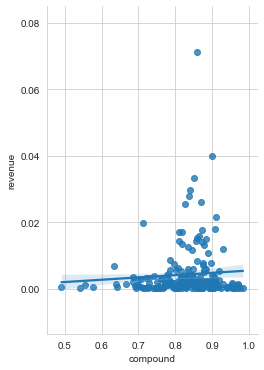

In [185]:
sns.pairplot(corr_df.sample(n=200), x_vars='compound', y_vars='revenue', size=5, aspect = 0.7, kind='reg');

#### Pearson's Correlation Test

In [186]:
stats.pearsonr(corr_df['compound'], corr_df['revenue'])

(0.0809460134636913, 1.7018709667392612e-57)

Pearson correlation returned correlation coefficient of approximately **0.08** with a very small p-value of 1.7e negative 57. The relationship between revenue and compound are statistically signficant with slight positive linear relationship as shown on the graph above. However, residuals (distance between data points and line) for the most part seem okay as majority of the datapoints are congested in one area but there are significant number of datapoints that are far from the line.

## Summary of Statistical Analysis
- **ANOVA (Analysis of Variance)** - Tested restaurant's lifespan and revenue (explanatory variables) and its business status (response variable) which concluded lifespan/revenue and is_open columns are associated, rejecting null hypothesis due to having very small p-value.
- **Chi-Square** - Tested stars columns (1.0-5.0) and restaurant's lifespan which also resulted in having association, open restaurants had significantly higher ratings count.
- **Pearson Correlation** - Tested between restaurant's revenue and its sentiment's compound score - it has slightly positive linear relationship with low p-value, most data points are congested in one area, however there are significant number of data points that has high residual value.